# Student Score Regression Model

### Author : Aditya Prabaswara Mardjikoen

### The Sparks Foundation Internship (April 2021) Task 1 - Prediction using Supervised Machine Learning

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables (one dependent variable and one independent variable). 

### Import Python Library and Score Data

First we will import the required Python library and display the first five row in the dataset.

In [35]:
# Imported all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [36]:
# Display first five row in the data
score=pd.read_csv('https://raw.githubusercontent.com/aprabaswara/student_scores/main/student_scores.csv')
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Next we will display the data types and the descriptive statistics for each columns in the student scores data.

In [37]:
# Display data types
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
# Display descriptive statistics
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [39]:
# Column list
score.columns

Index(['Hours', 'Scores'], dtype='object')

We can see that the student scores data contain two columns: student scores and study duration. In this task, we set the student scores as our dependent variable while the study duration become its independent variable.

##  Linearity Test

In this section, we will investigate how strong does the linear relationship between the student scores and study duration.

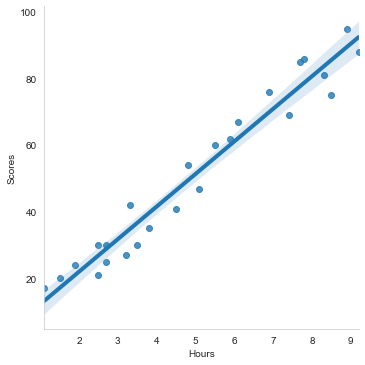

In [40]:
# Linearity relathionsip observations
sns.lmplot(x="Hours",y="Scores",data=score)
plt.grid(False)
plt.show()

In [41]:
# Coefficient of correlation table
score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Based on the scatter plot, we can say that student scores and study duration have a positive linear relationship. In addition, the coefficient of correlation table above indicate that both variable have strong linear relationship due to its value approaching 1.

## First Linear Regression Model

In this section we will buil our first linear regression model by splitting 20% of the data as the test data while others become the training data.

In [42]:
# Split the data using train test split
X = score.iloc[:, :-1].values
y = score.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2,random_state=0) 
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

Now we display the constant and coefficient in the first model.

In [51]:
print("Constant = {}".format(lm1.intercept_))
print("Coefficient Score = {}".format(lm1.coef_[0]))

Constant = 2.018160041434683
Coefficient Score = 9.910656480642237


we can formulate our first regression equation like this:

$$ \text{Scores} = 2.018160041434683 + 9.910656480642237 * \text{Hours} $$

The chart bellow show us the predicted value vs its actual value for the first model.

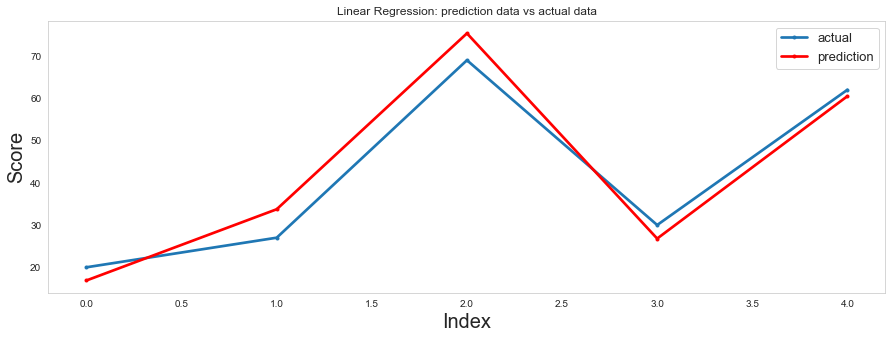

In [43]:
aa= [x for x in range(5)]
plt.rcParams['figure.figsize'] = (15,5) 
plt.rcParams['lines.linewidth'] = 2.7
plt.plot(aa, y_test[:5], marker='.', label="actual")
plt.plot(aa, lm1.predict(X_test)[:5], marker='.', color='r', label="prediction")
plt.ylabel('Score', size=20)
plt.xlabel('Index', size=20)
plt.legend(fontsize=13)
plt.title("Linear Regression: prediction data vs actual data") 
plt.grid(False)
plt.show()

## Second Linear Regression Model

We know proceed to build our second model by excluding the regression intercept from the model.

In [44]:
# Exclude regression intercept from the first model
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

Now we display the constant and coefficient in the second model.

In [52]:
print("Constant = {}".format(lm2.intercept_))
print("Coefficient Score = {}".format(lm2.coef_[0]))

Constant = 0.0
Coefficient Score = 10.225056487097156


we can formulate our second regression equation like this:

$$ \text{Scores} = 10.225056487097156 * \text{Hours} $$

The chart bellow show us the predicted value vs its actual value for the second model.

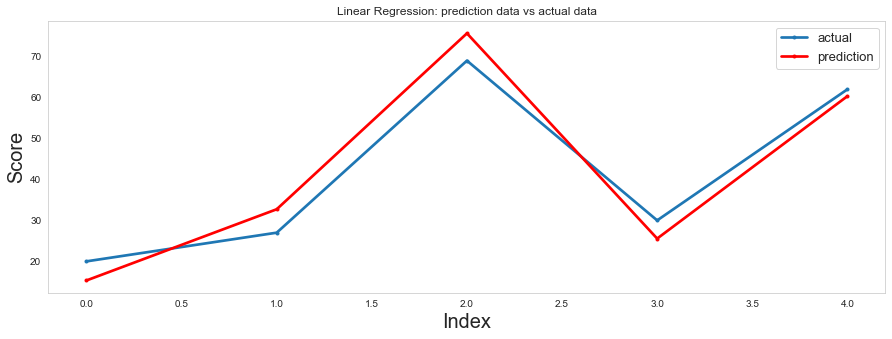

In [45]:
bb= [x for x in range(5)]
plt.rcParams['figure.figsize'] = (15,5) 
plt.rcParams['lines.linewidth'] = 2.7
plt.plot(bb, y_test[:5], marker='.', label="actual")
plt.plot(bb, lm2.predict(X_test)[:5], marker='.', color='r', label="prediction")
plt.ylabel('Score', size=20)
plt.xlabel('Index', size=20)
plt.legend(fontsize=13)
plt.title("Linear Regression: prediction data vs actual data") 
plt.grid(False)
plt.show()

## Third Linear Regression Model

Lastly, we will try to build our last model by transforming the student scores data using logarithm transformation. For understanding logarithm transformation that I used in this notebook, lets assume a dataset has two variable: $Y$ as its response variable and $X$ as its predictor variable. Let $Y'$=$\log(Y)$. Then, by doing the required step to get the regression coefficient, we can write it in these two equal form equation: $Y'=a+bX$ or $log(Y)= a+bX$, where $a$ and $b$ is the regression intercept and slope respectively.

First, we will transform our data by using the logarithm transformation. We set 10 as the logarithm base.

In [46]:
# Transform student score data
pred=[]
for y in score['Scores']:
    pred.append(math.log(y,10))
score['log_score']=pred
score.head()

,Hours,Scores,log_score
0,2.5,21,1.322219
1,5.1,47,1.672098
2,3.2,27,1.431364
3,8.5,75,1.875061
4,3.5,30,1.477121


Like the first model, we take 20% of the data as the test data while the rest of it become the training data.

In [47]:
# Build new data frame that contain the student study hours and the transformed student scores data.
new_score=pd.DataFrame({'Hours':score['Hours'],'log_score':score['log_score']})
X1 = new_score.iloc[:, :-1].values
y1 = new_score.iloc[:, 1].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,  test_size=0.2,random_state=0) 
lm3 = LinearRegression()
lm3.fit(X1_train,y1_train)

LinearRegression()

Now we will display the constant and coefficient in the third model.

In [53]:
print("Constant = {}".format(lm3.intercept_))
print("Coefficient Score = {}".format(lm3.coef_[0]))

Constant = 1.2104836060800999
Coefficient Score = 0.0888806511983993


We can write the third model like this:

    log(Scores) = 1.2104836060800999 + 0.0888806511983993 * Hours

The chart bellow show us the predicted value vs its actual value for the third model.

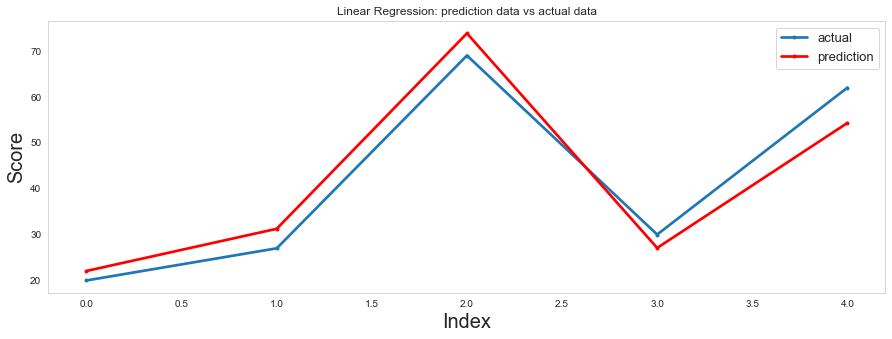

In [48]:
cc= [x for x in range(5)]
y_predict=10**(lm3.intercept_+lm3.coef_[0]*X_test)
plt.rcParams['figure.figsize'] = (15,5) 
plt.rcParams['lines.linewidth'] = 2.7
plt.plot(cc, y_test[:5], marker='.', label="actual")
plt.plot(cc, y_predict[:5], marker='.', color='r', label="prediction")
plt.ylabel('Score', size=20)
plt.xlabel('Index', size=20)
plt.legend(fontsize=13)
plt.title("Linear Regression: prediction data vs actual data") 
plt.grid(False)
plt.show()

## Model Evaluation

In this section, we will evaluate all the regression model in this notebook by using this thre metrics:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [49]:
# Create comparison table
mae=[]
mse=[]
rmse=[]
for i in [lm1,lm2,lm3]:
    if i!=lm3:
        mae.append(metrics.mean_absolute_error(y_test, i.predict(X_test)))
        mse.append(metrics.mean_squared_error(y_test, i.predict(X_test)))
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, i.predict(X_test))))
    else:
        mae.append(metrics.mean_absolute_error(y_test, y_predict))
        mse.append(metrics.mean_squared_error(y_test, y_predict))
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
        
model=pd.DataFrame({'Model':['1','2','3'],'MAE':mae,'MSE':mse,'RMSE':rmse})
model

,Model,MAE,MSE,RMSE
0,1,4.183860,21.598769,4.647448
1,2,4.631508,24.274535,4.926919
2,3,4.351216,22.661003,4.760357


From the comparison table above, we will pick the first model because it has the lowest mean square error, mean absolute error, and root mean square error.

## Model Deployment

Lastly, we will use the first model to predict a student who study for 9.25 hours/day.

In [50]:
hours = 9.25
own_pred=lm1.predict(np.array(hours).reshape(-1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


From the output above, we can conclude that if a student study for 9.25 hours/day, it is estimated his or her score percentage will be around 94.